 Classification with Logistic Regression

In [7]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

1.Choose a binary classification dataset.

In [ ]:
# Load Dataset (Binary Classification)
data = load_breast_cancer()
x = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target) # 0 = malignant, 1 = benign 

 2.Train/test split and standardize features.

In [9]:
# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize features (mean=0, std=1)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

 3.Fit a Logistic Regression model.

In [10]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(x_train_scaled, y_train)

LogisticRegression()

 4.Evaluate with confusion matrix, precision, recall, ROC-AUC.

Confusion Matrix:
 [[41  2]
 [ 0 71]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

ROC-AUC Score: 0.9977071732721913


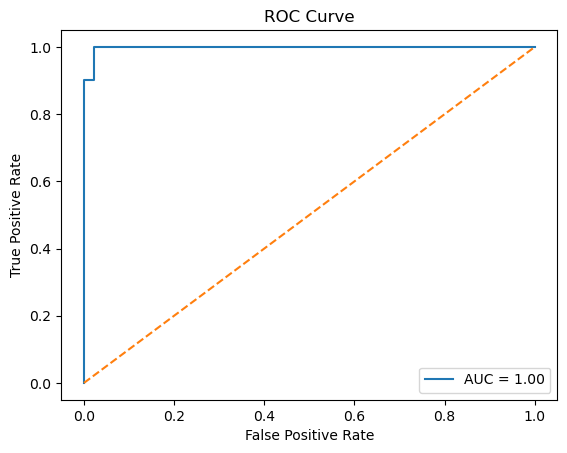

In [14]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict probabilities 
y_proba = model.predict_proba(x_test_scaled)[:, 1]
y_pred = model.predict(x_test_scaled)

# Confusion matrix & classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC Score
auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", auc)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

 5.Tune threshold and explain sigmoid function.

In [15]:
# Tune threshold (e.g., 0.3)
threshold = 0.3
y_custom = (y_proba >= threshold).astype(int)

print("Custom Threshold Confusion Matrix:\n", confusion_matrix(y_test, y_custom))
print("\nCustom Threshold Classification Report:\n", classification_report(y_test, y_custom))


Custom Threshold Confusion Matrix:
 [[39  4]
 [ 0 71]]

Custom Threshold Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        43
           1       0.95      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



| Metric              | Result       |
|---------------------|--------------|
| **Accuracy**        | 98%          |
| **Precision (Class 0)** | 100%         |
| **Recall (Class 0)**    | 95%          |
| **Precision (Class 1)** | 97%          |
| **Recall (Class 1)**    | 100%         |
| **ROC-AUC**         | **0.998** 🎯 |